<a href="https://colab.research.google.com/github/HatemGamal/ElectroPi/blob/main/Market_Segmentation_With_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/HatemGamal/ElectroPi/5a5a4240baf1619b25d0fe5ca77d897cfdff4ba5/sample_data/bank-additional-full.csv')
df.shape

(41188, 21)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.info()
#No null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

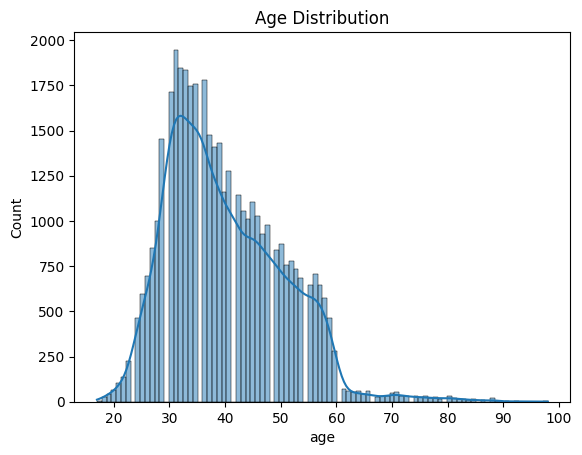

In [8]:
# 1. Age
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

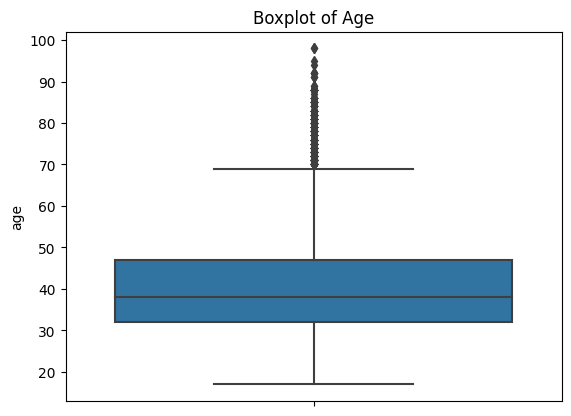

In [9]:
sns.boxplot(y=df['age'])
plt.title('Boxplot of Age')
plt.show()

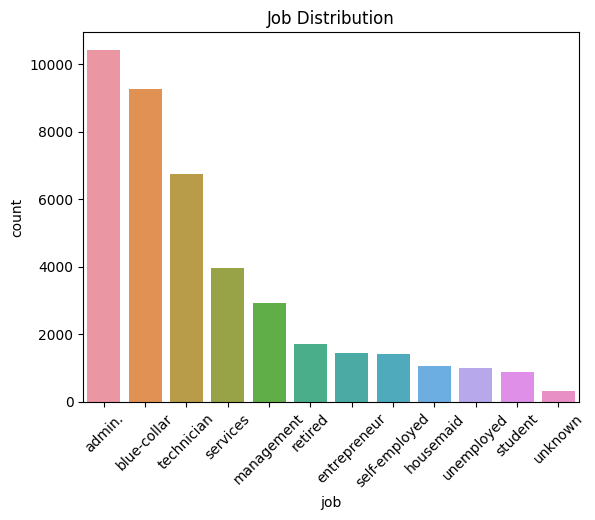

In [10]:
# 2. Job distribution
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Job Distribution')
plt.xticks(rotation=45)
plt.show()

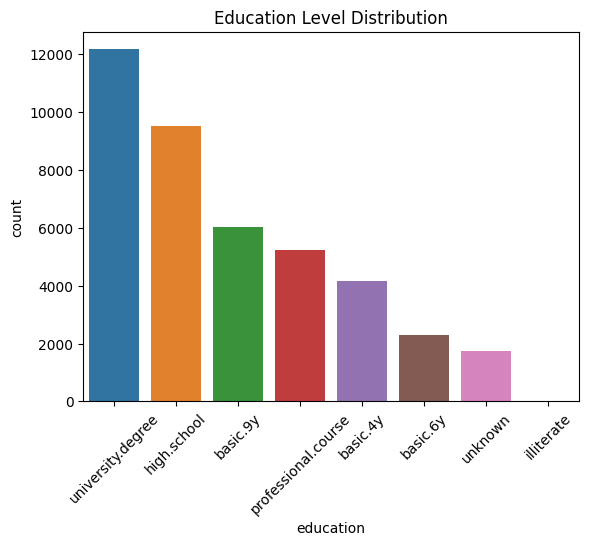

In [11]:
# 4. Education
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

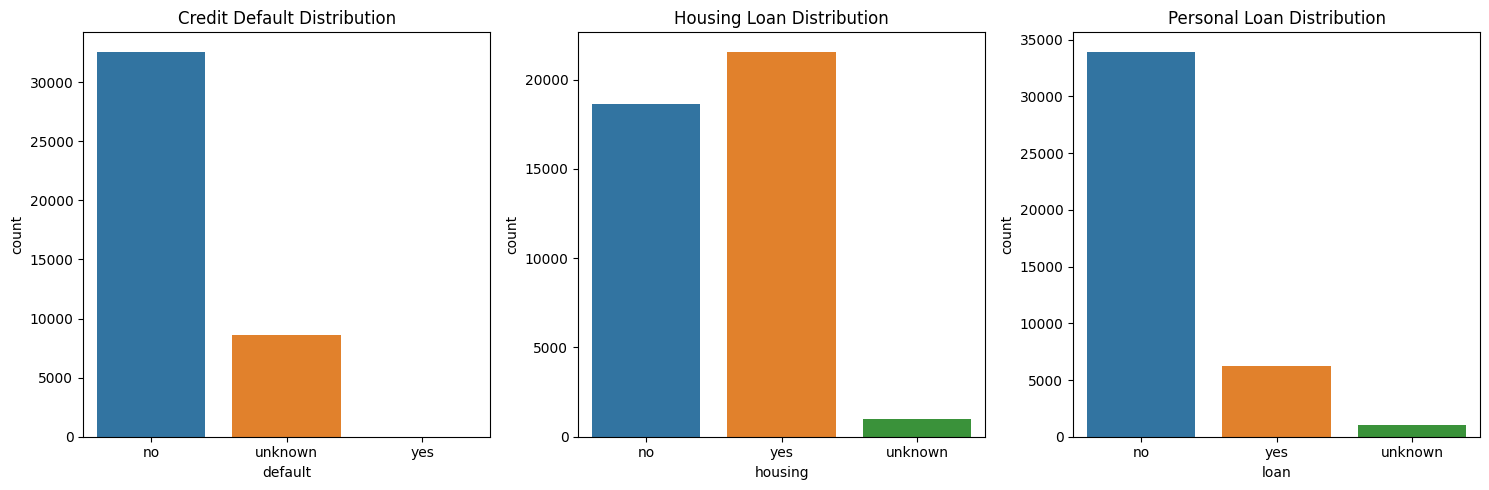

In [12]:
# 5. Default, Housing, Loan
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(data=df, x='default', ax=ax[0])
ax[0].set_title('Credit Default Distribution')

sns.countplot(data=df, x='housing', ax=ax[1])
ax[1].set_title('Housing Loan Distribution')

sns.countplot(data=df, x='loan', ax=ax[2])
ax[2].set_title('Personal Loan Distribution')

plt.tight_layout()
plt.show()

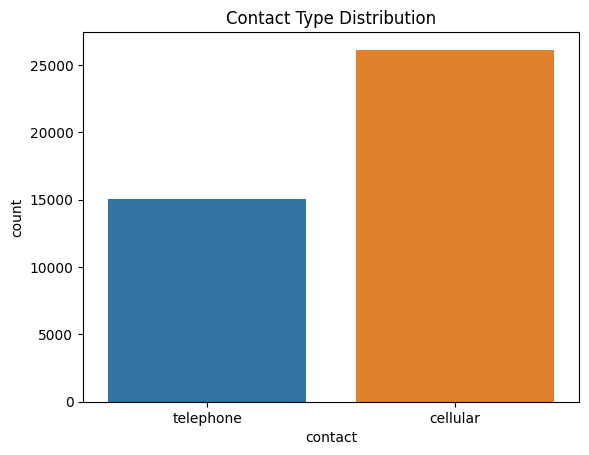

In [13]:
# 6. Contact
sns.countplot(data=df, x='contact')
plt.title('Contact Type Distribution')
plt.show()

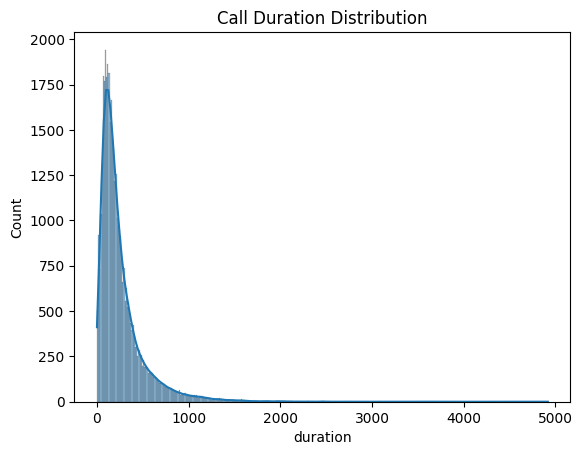

In [14]:
# 9. Duration
sns.histplot(df['duration'], kde=True)
plt.title('Call Duration Distribution')
plt.show()

In [15]:
# Different categorial features and there values in the dataset are:
print("Jobs: \n", df["job"].unique(),'\n')
print("Marital Status: \n", df['marital'].unique(),'\n')
print("Education: \n", df['education'].unique(),'\n')
print("Default on Credit: \n", df['default'].unique(),'\n')
print("Housing loan: \n", df['housing'].unique(),'\n')
print("Loan default: \n", df['loan'].unique(),'\n')
print("Contact type: \n", df['contact'].unique(),'\n')
print("Months: \n", df['month'].unique(),'\n')
print("day_of_week: \n", df['day_of_week'].unique(),'\n')
print("Poutcome: \n",df["poutcome"].unique(),'\n')

Jobs: 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

Marital Status: 
 ['married' 'single' 'divorced' 'unknown'] 

Education: 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

Default on Credit: 
 ['no' 'unknown' 'yes'] 

Housing loan: 
 ['no' 'yes' 'unknown'] 

Loan default: 
 ['no' 'yes' 'unknown'] 

Contact type: 
 ['telephone' 'cellular'] 

Months: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week: 
 ['mon' 'tue' 'wed' 'thu' 'fri'] 

Poutcome: 
 ['nonexistent' 'failure' 'success'] 



Creating label encoders to treat all categorical variables

In [16]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

In [17]:
df["job"] = labelencoder_X.fit_transform(df["job"])
df["marital"] = labelencoder_X.fit_transform(df["marital"])
df["education"] = labelencoder_X.fit_transform(df["education"])
df["default"] = labelencoder_X.fit_transform(df["default"])
df["housing"] = labelencoder_X.fit_transform(df["housing"])
df["loan"] = labelencoder_X.fit_transform(df["loan"])
df["contact"] = labelencoder_X.fit_transform(df["contact"])
df["month"] = labelencoder_X.fit_transform(df["month"])
df["day_of_week"] = labelencoder_X.fit_transform(df["day_of_week"])
df["poutcome"] = labelencoder_X.fit_transform(df["poutcome"])
df["y"] = labelencoder_X.fit_transform(df["y"])

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


<Axes: >

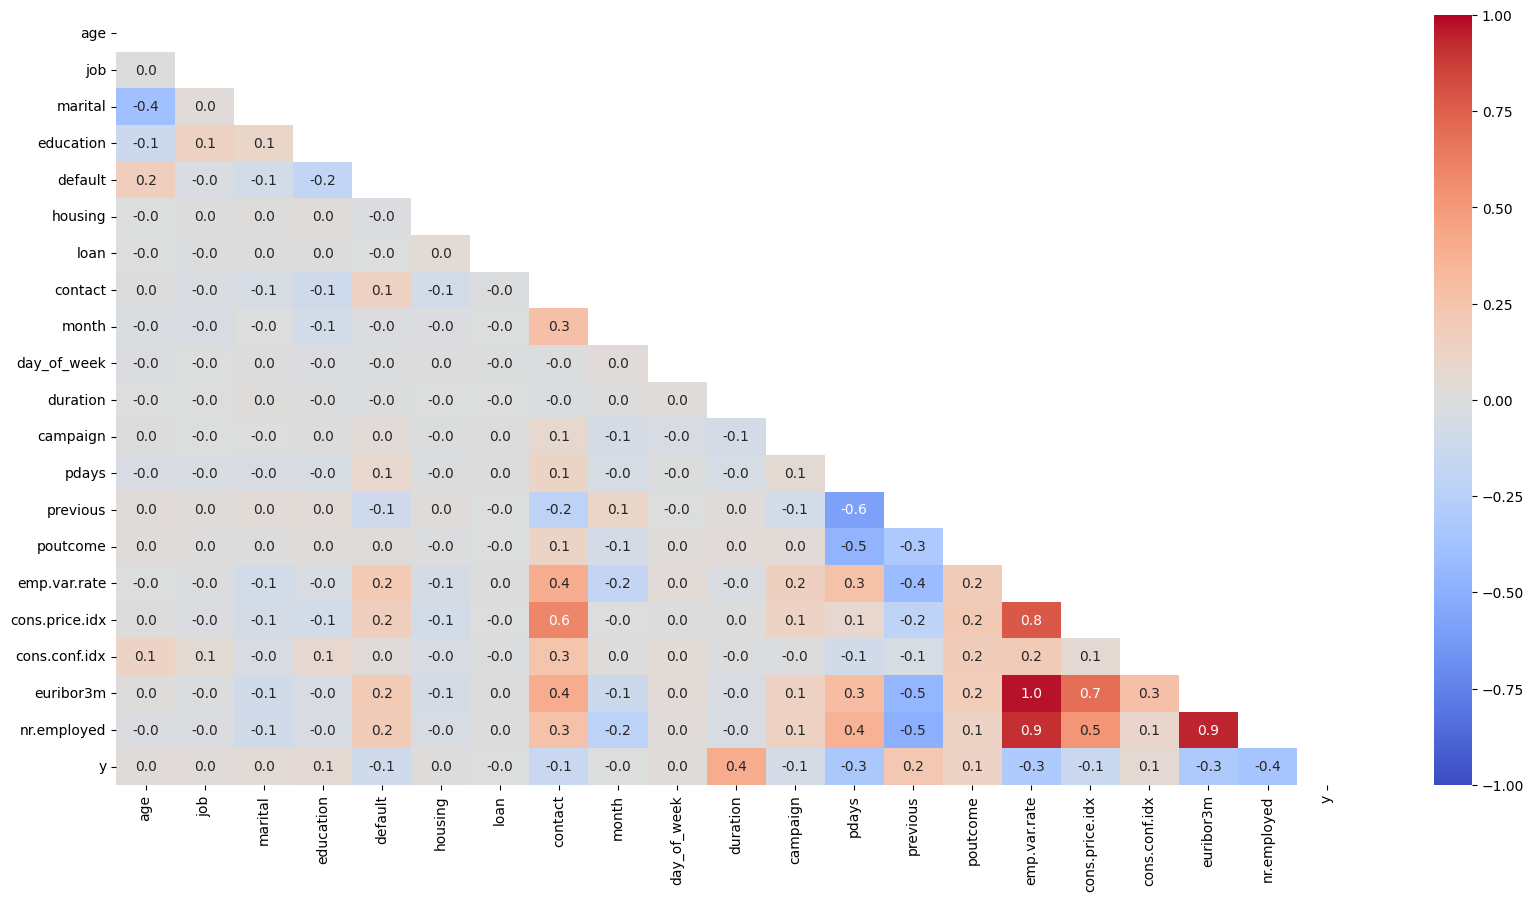

In [19]:
# Generate correlation matrix heat map to check which feature has greatest influence on the output
fig, ax = plt.subplots(figsize = (20, 10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

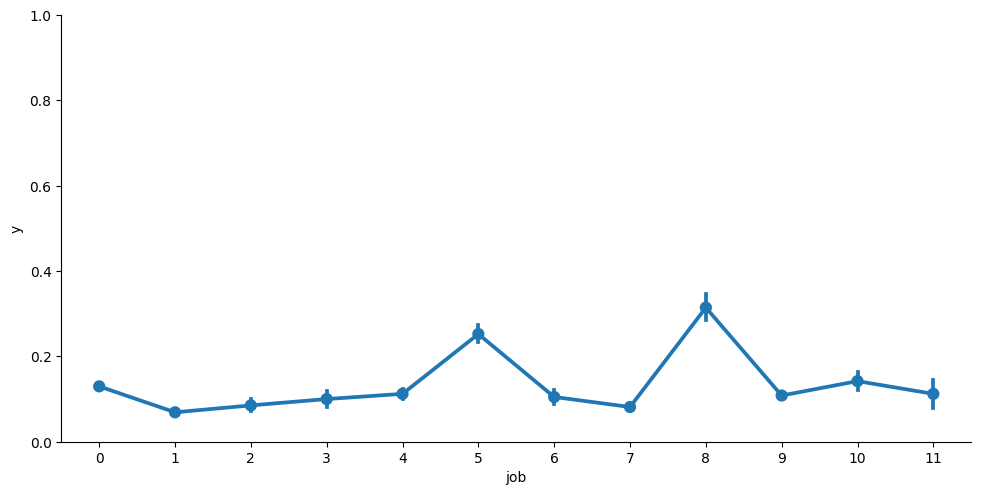

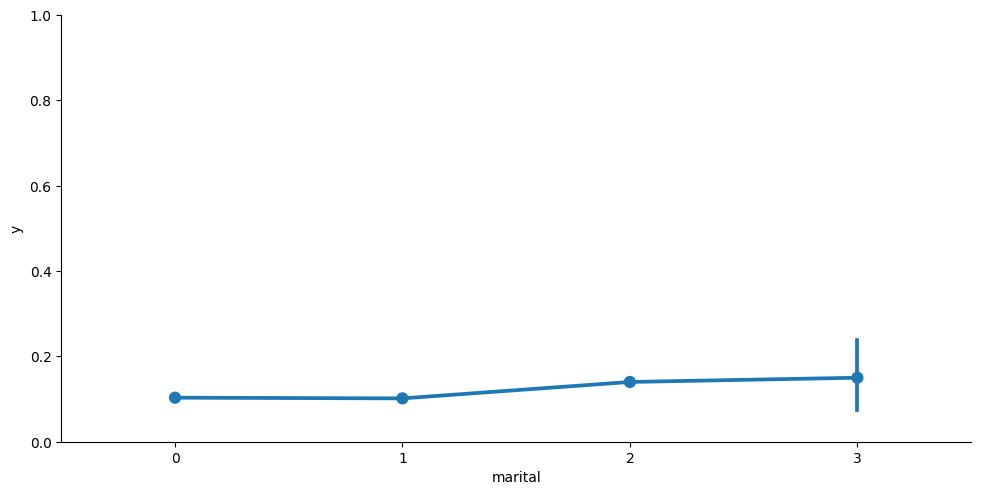

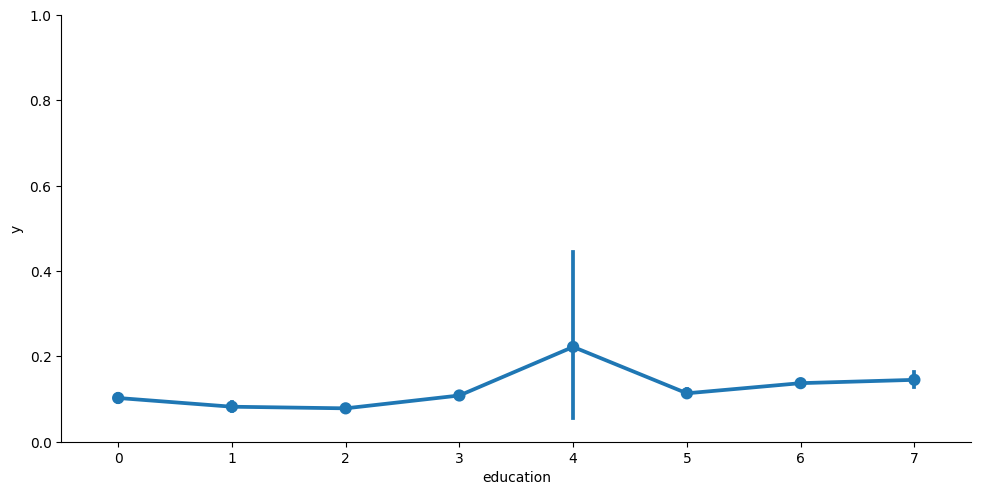

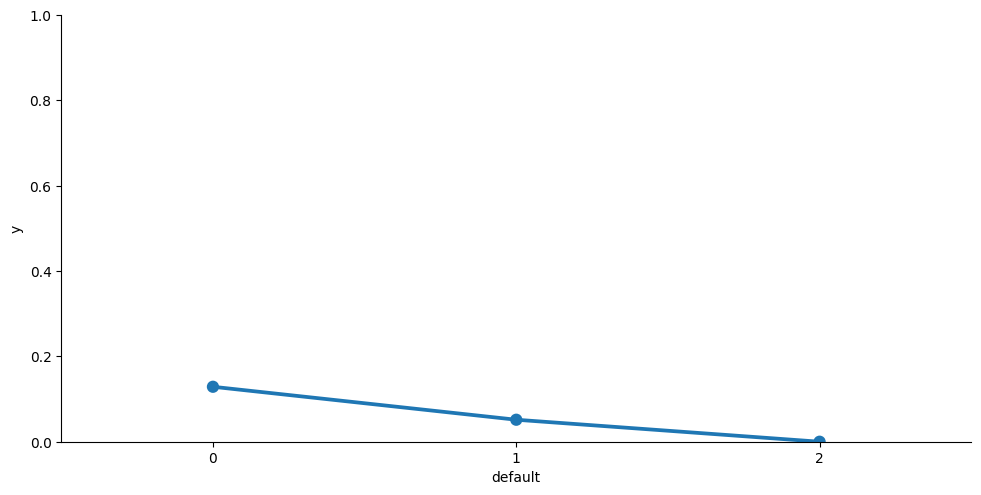

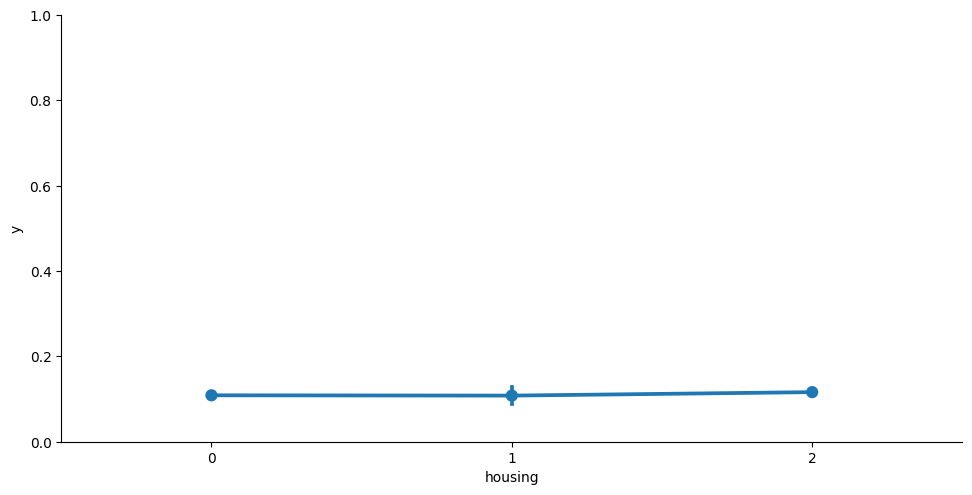

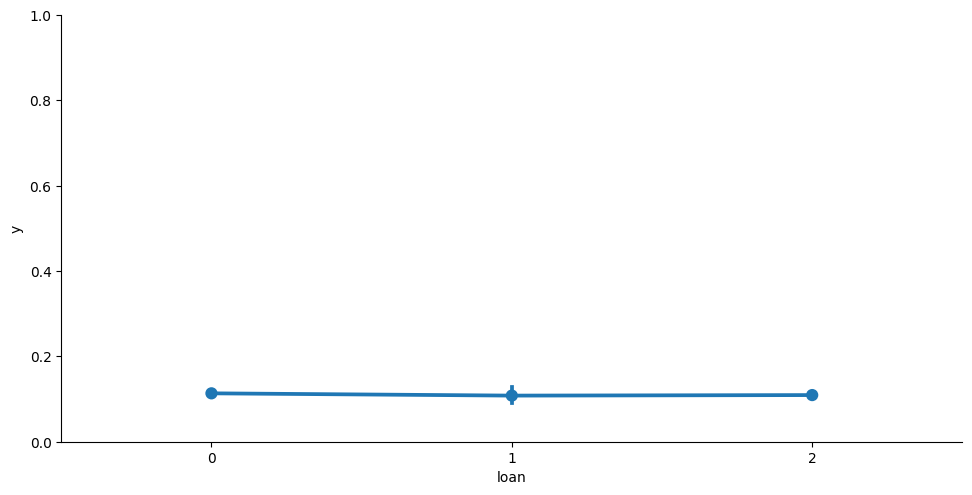

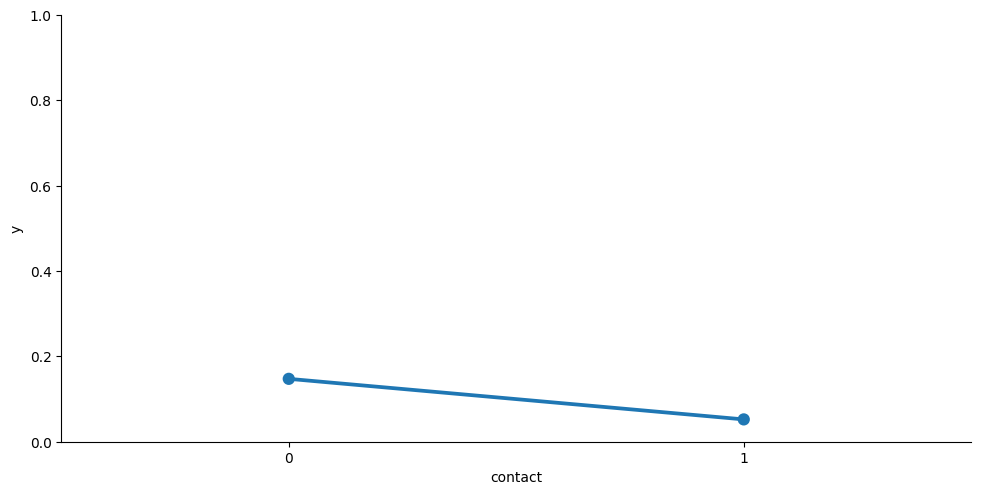

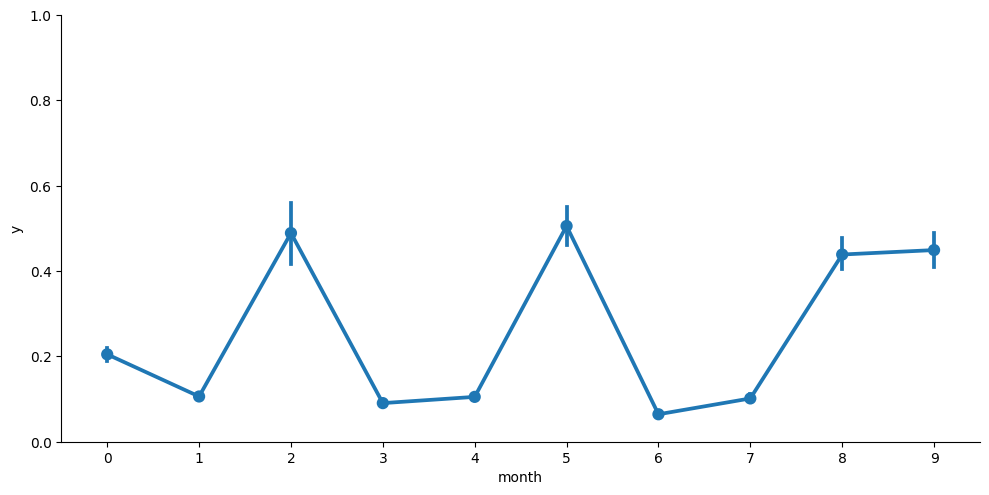

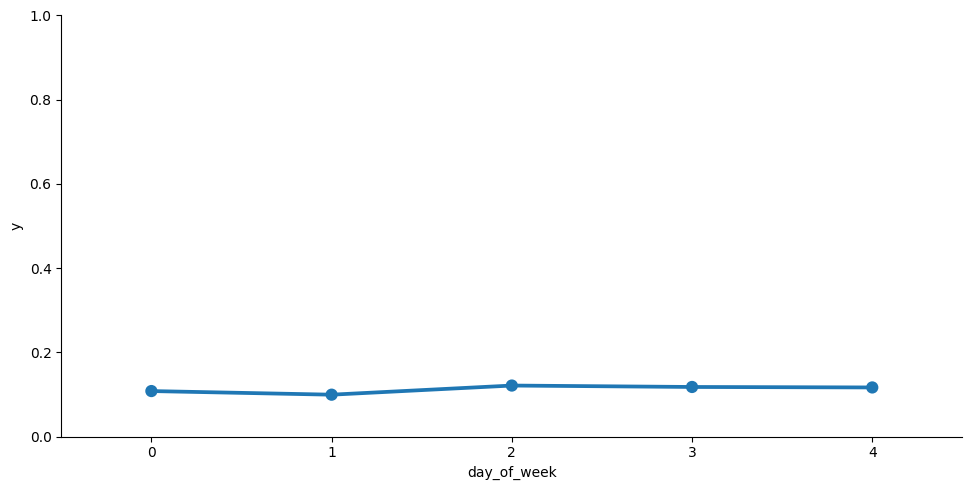

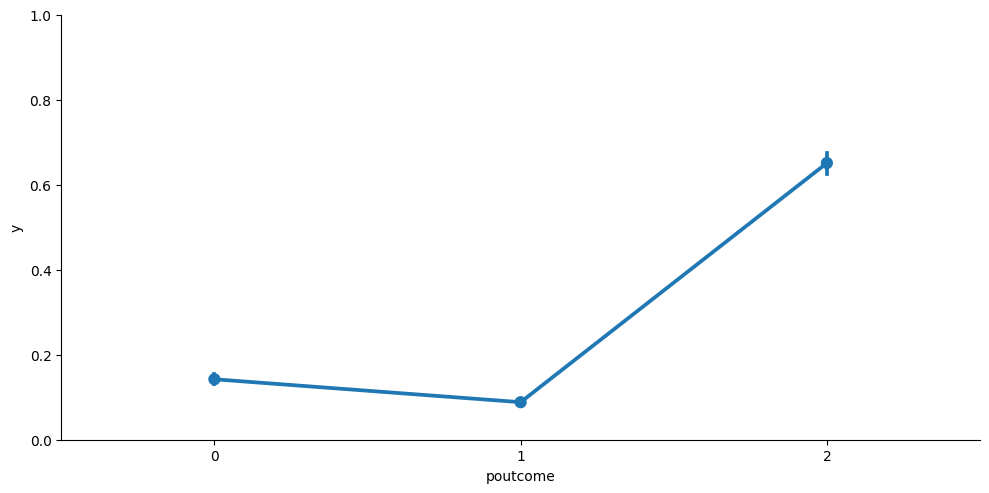

In [20]:

# Generate plots for categorical features
for col in ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]:
    sns.catplot(x=col, y='y', data=df, kind='point', aspect=2, )
    plt.ylim(0, 1)

<Axes: >

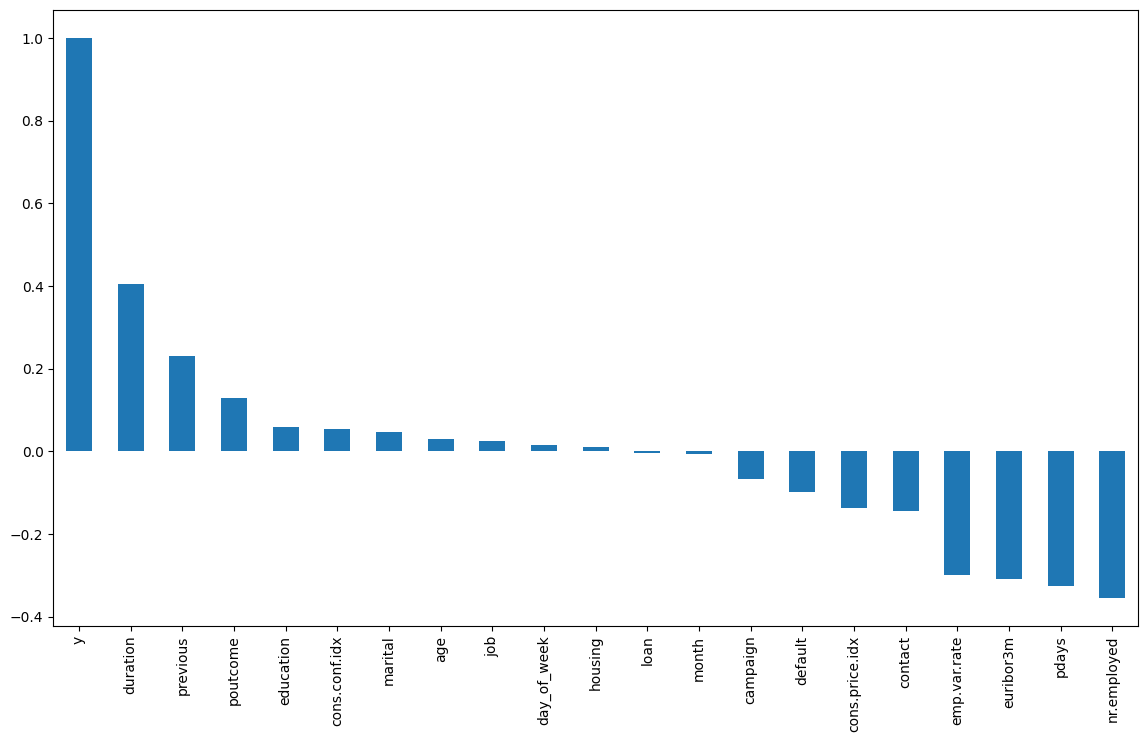

In [21]:
#Correlation plot
plt.figure(figsize=(14,8))
df.corr()['y'].sort_values(ascending = False).plot(kind='bar')

From the above graph, it can be concluded that call duration has the largest effect on the target

# New Section

In [22]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [23]:
df.drop(df[df.y==2].index, inplace=True)
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

From the above output we can figue out that our data is imballenced.

**Dealing with imballenced dataset**

We can see that the data is imballenced so the output of the model will be biased. One way to move forward is:
1.   Undersample the data
2.   Oversample the data




In [24]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
# Preparing the dataframe to be fed into undersample
df_x = df.iloc[:,:-1]
df_y = df['y']
# Getting out new data
X, y = oversample.fit_resample(df_x, df_y)
# Adding output column back to X to perform feature selection
X['y'] = y
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [25]:
X.y.value_counts()

0    36548
1    36548
Name: y, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X=df.drop('y',axis=1)
y=df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [28]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split, KFold
import sklearn.metrics as sk
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define a function to create the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model



In [30]:
# Create and compile the model
model = create_model()

epoch=[10]
for e in epoch:
  # Fitting the ANN to the Training set
  history=model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=e,validation_split=0.3
    )
  # Predicting the Test set results
  y_pred = model.predict(X_test)
  pre_score = sk.average_precision_score(y_test, y_pred)
  model.summary()
  test_results = model.evaluate(X_test, y_test)
  print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
  print("The model test average precision score is {}.".format(pre_score))




Epoch 1/10
631/631 [==============================] - 5s 5ms/step - loss: 0.3491 - accuracy: 0.8607 - val_loss: 0.2148 - val_accuracy: 0.8871
Epoch 2/10
631/631 [==============================] - 3s 5ms/step - loss: 0.2442 - accuracy: 0.8930 - val_loss: 0.2089 - val_accuracy: 0.9036
Epoch 3/10
631/631 [==============================] - 2s 4ms/step - loss: 0.2272 - accuracy: 0.8975 - val_loss: 0.2044 - val_accuracy: 0.9042
Epoch 4/10
631/631 [==============================] - 2s 4ms/step - loss: 0.2210 - accuracy: 0.8985 - val_loss: 0.2107 - val_accuracy: 0.8938
Epoch 5/10
631/631 [==============================] - 4s 6ms/step - loss: 0.2144 - accuracy: 0.9001 - val_loss: 0.2020 - val_accuracy: 0.9012
Epoch 6/10
631/631 [==============================] - 3s 4ms/step - loss: 0.2100 - accuracy: 0.9006 - val_loss: 0.1974 - val_accuracy: 0.9047
Epoch 7/10
631/631 [==============================] - 3s 4ms/step - loss: 0.2055 - accuracy: 0.9035 - val_loss: 0.1966 - val_accuracy: 0.9047
Epoch 